In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
df=pd.read_excel("C:\\Users\\janar\\OneDrive\\Desktop\\hh\\world_population2023.xlsx")
df

,Unnamed: 0,country name,current population,population 2022,area,land area,density,growth rate,world percentage,rank
0,0,India,"1,423,118,510","1,417,173,173",3.3M,3M,481,0.81%,17.85%,1
1,1,China,"1,425,820,141","1,425,887,337",9.7M,9.4M,151,-0.02%,17.81%,2
2,2,United States,"339,231,549","338,289,857",9.4M,9.1M,37,0.50%,4.25%,3
3,3,Indonesia,"276,576,867","275,501,339",1.9M,1.9M,148,0.74%,3.47%,4
4,4,Pakistan,"238,517,163","235,824,862",881.9K,770.9K,312,1.98%,3.00%,5
...,...,...,...,...,...,...,...,...,...,...
200,200,San Marino,"33,642","33,660",61,60,561,-0.05%,0.00%,218
201,201,Palau,"18,058","18,055",459,460,39,0.02%,0.00%,222
202,202,Nauru,"12,780","12,668",21,20,639,0.88%,0.00%,225
203,203,Tuvalu,"11,396","11,312",26,30,380,0.74%,0.00%,227


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          205 non-null    int64 
 1   country name        205 non-null    object
 2   current population  205 non-null    object
 3   population 2022     205 non-null    object
 4   area                205 non-null    object
 5   land area           205 non-null    object
 6   density             205 non-null    object
 7   growth rate         205 non-null    object
 8   world percentage    204 non-null    object
 9   rank                205 non-null    int64 
dtypes: int64(2), object(8)
memory usage: 16.1+ KB


In [6]:
df.describe()

,Unnamed: 0,rank
count,205.000000,205.000000
mean,102.000000,104.351220
std,59.322565,61.585136
min,0.000000,1.000000
25%,51.000000,52.000000
50%,102.000000,103.000000
75%,153.000000,154.000000
max,204.000000,234.000000


In [7]:
# Checking for null values
mask = df["world percentage"].isna()

In [8]:
# Boolean masking
df[mask]

,Unnamed: 0,country name,current population,population 2022,area,land area,density,growth rate,world percentage,rank
204,204,Vatican City,518,510,< 1,< 1,"1,177",1.57%,NaN,234


In [9]:
# Index 204 contains a null value in world percentage column
# Replacing NaN with 0
df["world percentage"].fillna(0,inplace = True)

In [10]:
# Finding duplicate values
df[df.duplicated()] 
# No duplicate value present in dataset

,Unnamed: 0,country name,current population,population 2022,area,land area,density,growth rate,world percentage,rank


In [11]:
# Drooping column
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [12]:
# Sorting index
a=df.sort_index(inplace = True)

In [13]:
# Coverting column names into title case
df.columns = df.columns.str.title()

In [14]:
df

,Country Name,Current Population,Population 2022,Area,Land Area,Density,Growth Rate,World Percentage,Rank
0,India,"1,423,118,510","1,417,173,173",3.3M,3M,481,0.81%,17.85%,1
1,China,"1,425,820,141","1,425,887,337",9.7M,9.4M,151,-0.02%,17.81%,2
2,United States,"339,231,549","338,289,857",9.4M,9.1M,37,0.50%,4.25%,3
3,Indonesia,"276,576,867","275,501,339",1.9M,1.9M,148,0.74%,3.47%,4
4,Pakistan,"238,517,163","235,824,862",881.9K,770.9K,312,1.98%,3.00%,5
...,...,...,...,...,...,...,...,...,...
200,San Marino,"33,642","33,660",61,60,561,-0.05%,0.00%,218
201,Palau,"18,058","18,055",459,460,39,0.02%,0.00%,222
202,Nauru,"12,780","12,668",21,20,639,0.88%,0.00%,225
203,Tuvalu,"11,396","11,312",26,30,380,0.74%,0.00%,227


In [15]:
df.columns

Index(['Country Name', 'Current Population', 'Population 2022', 'Area',
       'Land Area', 'Density', 'Growth Rate', 'World Percentage', 'Rank'],
      dtype='object')

In [16]:
# Renaming fe more columns 

df.rename(columns = {"Country Name":"Country"},inplace = True)
df.rename(columns = {'Current Population':"Population 2023"},inplace = True)
df.rename(columns = {'Area':'Area(km²)'},inplace = True)
df.rename(columns = {'Land Area':'Land Area(km²)'},inplace = True)
df.rename(columns = {'Density':'Density (/km²)'},inplace = True)
df.rename(columns = {'World Percentage':'World %'},inplace = True)

In [17]:
df

,Country,Population 2023,Population 2022,Area(km²),Land Area(km²),Density (/km²),Growth Rate,World %,Rank
0,India,"1,423,118,510","1,417,173,173",3.3M,3M,481,0.81%,17.85%,1
1,China,"1,425,820,141","1,425,887,337",9.7M,9.4M,151,-0.02%,17.81%,2
2,United States,"339,231,549","338,289,857",9.4M,9.1M,37,0.50%,4.25%,3
3,Indonesia,"276,576,867","275,501,339",1.9M,1.9M,148,0.74%,3.47%,4
4,Pakistan,"238,517,163","235,824,862",881.9K,770.9K,312,1.98%,3.00%,5
...,...,...,...,...,...,...,...,...,...
200,San Marino,"33,642","33,660",61,60,561,-0.05%,0.00%,218
201,Palau,"18,058","18,055",459,460,39,0.02%,0.00%,222
202,Nauru,"12,780","12,668",21,20,639,0.88%,0.00%,225
203,Tuvalu,"11,396","11,312",26,30,380,0.74%,0.00%,227


In [18]:
# Replacing "," and "%" 

df["Population 2023"]= df["Population 2023"].str.replace(',','')
df["Population 2022"]=df["Population 2022"].str.replace(',','')
df["Growth Rate"]=df["Growth Rate"].str.replace('%','')
df["World %"]=df["World %"].str.replace('%','')
df["Density (/km²)"]=df["Density (/km²)"].str.replace(',','')

In [19]:
df

,Country,Population 2023,Population 2022,Area(km²),Land Area(km²),Density (/km²),Growth Rate,World %,Rank
0,India,1423118510,1417173173,3.3M,3M,481,0.81,17.85,1
1,China,1425820141,1425887337,9.7M,9.4M,151,-0.02,17.81,2
2,United States,339231549,338289857,9.4M,9.1M,37,0.50,4.25,3
3,Indonesia,276576867,275501339,1.9M,1.9M,148,0.74,3.47,4
4,Pakistan,238517163,235824862,881.9K,770.9K,312,1.98,3.00,5
...,...,...,...,...,...,...,...,...,...
200,San Marino,33642,33660,61,60,561,-0.05,0.00,218
201,Palau,18058,18055,459,460,39,0.02,0.00,222
202,Nauru,12780,12668,21,20,639,0.88,0.00,225
203,Tuvalu,11396,11312,26,30,380,0.74,0.00,227


In [20]:
# Changing row value of Population 2023 using .loc accessor
df.loc[0,"Population 2023"] = 1429834379
df.loc[0,"Growth Rate"]= 0.91

In [21]:
df

,Country,Population 2023,Population 2022,Area(km²),Land Area(km²),Density (/km²),Growth Rate,World %,Rank
0,India,1429834379,1417173173,3.3M,3M,481,0.91,17.85,1
1,China,1425820141,1425887337,9.7M,9.4M,151,-0.02,17.81,2
2,United States,339231549,338289857,9.4M,9.1M,37,0.50,4.25,3
3,Indonesia,276576867,275501339,1.9M,1.9M,148,0.74,3.47,4
4,Pakistan,238517163,235824862,881.9K,770.9K,312,1.98,3.00,5
...,...,...,...,...,...,...,...,...,...
200,San Marino,33642,33660,61,60,561,-0.05,0.00,218
201,Palau,18058,18055,459,460,39,0.02,0.00,222
202,Nauru,12780,12668,21,20,639,0.88,0.00,225
203,Tuvalu,11396,11312,26,30,380,0.74,0.00,227


In [22]:
# Converting to numeric datatypes
df = df.astype({'Population 2023':'int','Population 2022':'int','Growth Rate': 'float', 'World %': 'float',"Density (/km²)":"float"},errors = "raise")

In [23]:
df.dtypes

Country             object
Population 2023      int32
Population 2022      int32
Area(km²)           object
Land Area(km²)      object
Density (/km²)     float64
Growth Rate        float64
World %            float64
Rank                 int64
dtype: object

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          205 non-null    object 
 1   Population 2023  205 non-null    int32  
 2   Population 2022  205 non-null    int32  
 3   Area(km²)        205 non-null    object 
 4   Land Area(km²)   205 non-null    object 
 5   Density (/km²)   205 non-null    float64
 6   Growth Rate      205 non-null    float64
 7   World %          204 non-null    float64
 8   Rank             205 non-null    int64  
dtypes: float64(3), int32(2), int64(1), object(3)
memory usage: 12.9+ KB


In [25]:
# Deploying .decribe() method to obtain aggegated values of numeric columns
# Deploying T attribute to Transpose rows and columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Population 2023,205.0,3.910728e+07,1.461823e+08,518.00,1480242.00,7590327.000,28570189.00,1.429834e+09
Population 2022,205.0,3.888173e+07,1.455222e+08,510.00,1472233.00,7529475.000,28160542.00,1.425887e+09
Density (/km²),205.0,3.440592e+02,1.482715e+03,0.14,35.00,95.000,235.00,1.814900e+04
Growth Rate,205.0,1.065366e+00,1.277525e+00,-7.45,0.31,0.900,1.92,4.980000e+00
World %,204.0,4.925490e-01,1.830375e+00,0.00,0.02,0.105,0.36,1.785000e+01
Rank,205.0,1.043512e+02,6.158514e+01,1.00,52.00,103.000,154.00,2.340000e+02


In [26]:
# Importing matplotlib and seaborn
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [28]:
# Employing .head() method to retrieve top 10 records
m1 = df.head(10)
m1

,Country,Population 2023,Population 2022,Area(km²),Land Area(km²),Density (/km²),Growth Rate,World %,Rank
0,India,1429834379,1417173173,3.3M,3M,481.0,0.91,17.85,1
1,China,1425820141,1425887337,9.7M,9.4M,151.0,-0.02,17.81,2
2,United States,339231549,338289857,9.4M,9.1M,37.0,0.50,4.25,3
3,Indonesia,276576867,275501339,1.9M,1.9M,148.0,0.74,3.47,4
4,Pakistan,238517163,235824862,881.9K,770.9K,312.0,1.98,3.00,5
5,Nigeria,221592544,218541212,923.8K,910.8K,246.0,2.41,2.80,6
6,Brazil,215904975,215313498,8.5M,8.4M,26.0,0.52,2.70,7
7,Bangladesh,172220907,171186372,147.6K,130.2K,1329.0,1.03,2.16,8
8,Russia,144652401,144713314,17.1M,16.4M,9.0,-0.19,1.80,9
9,Mexico,128061868,127504125,2M,1.9M,66.0,0.75,1.60,10


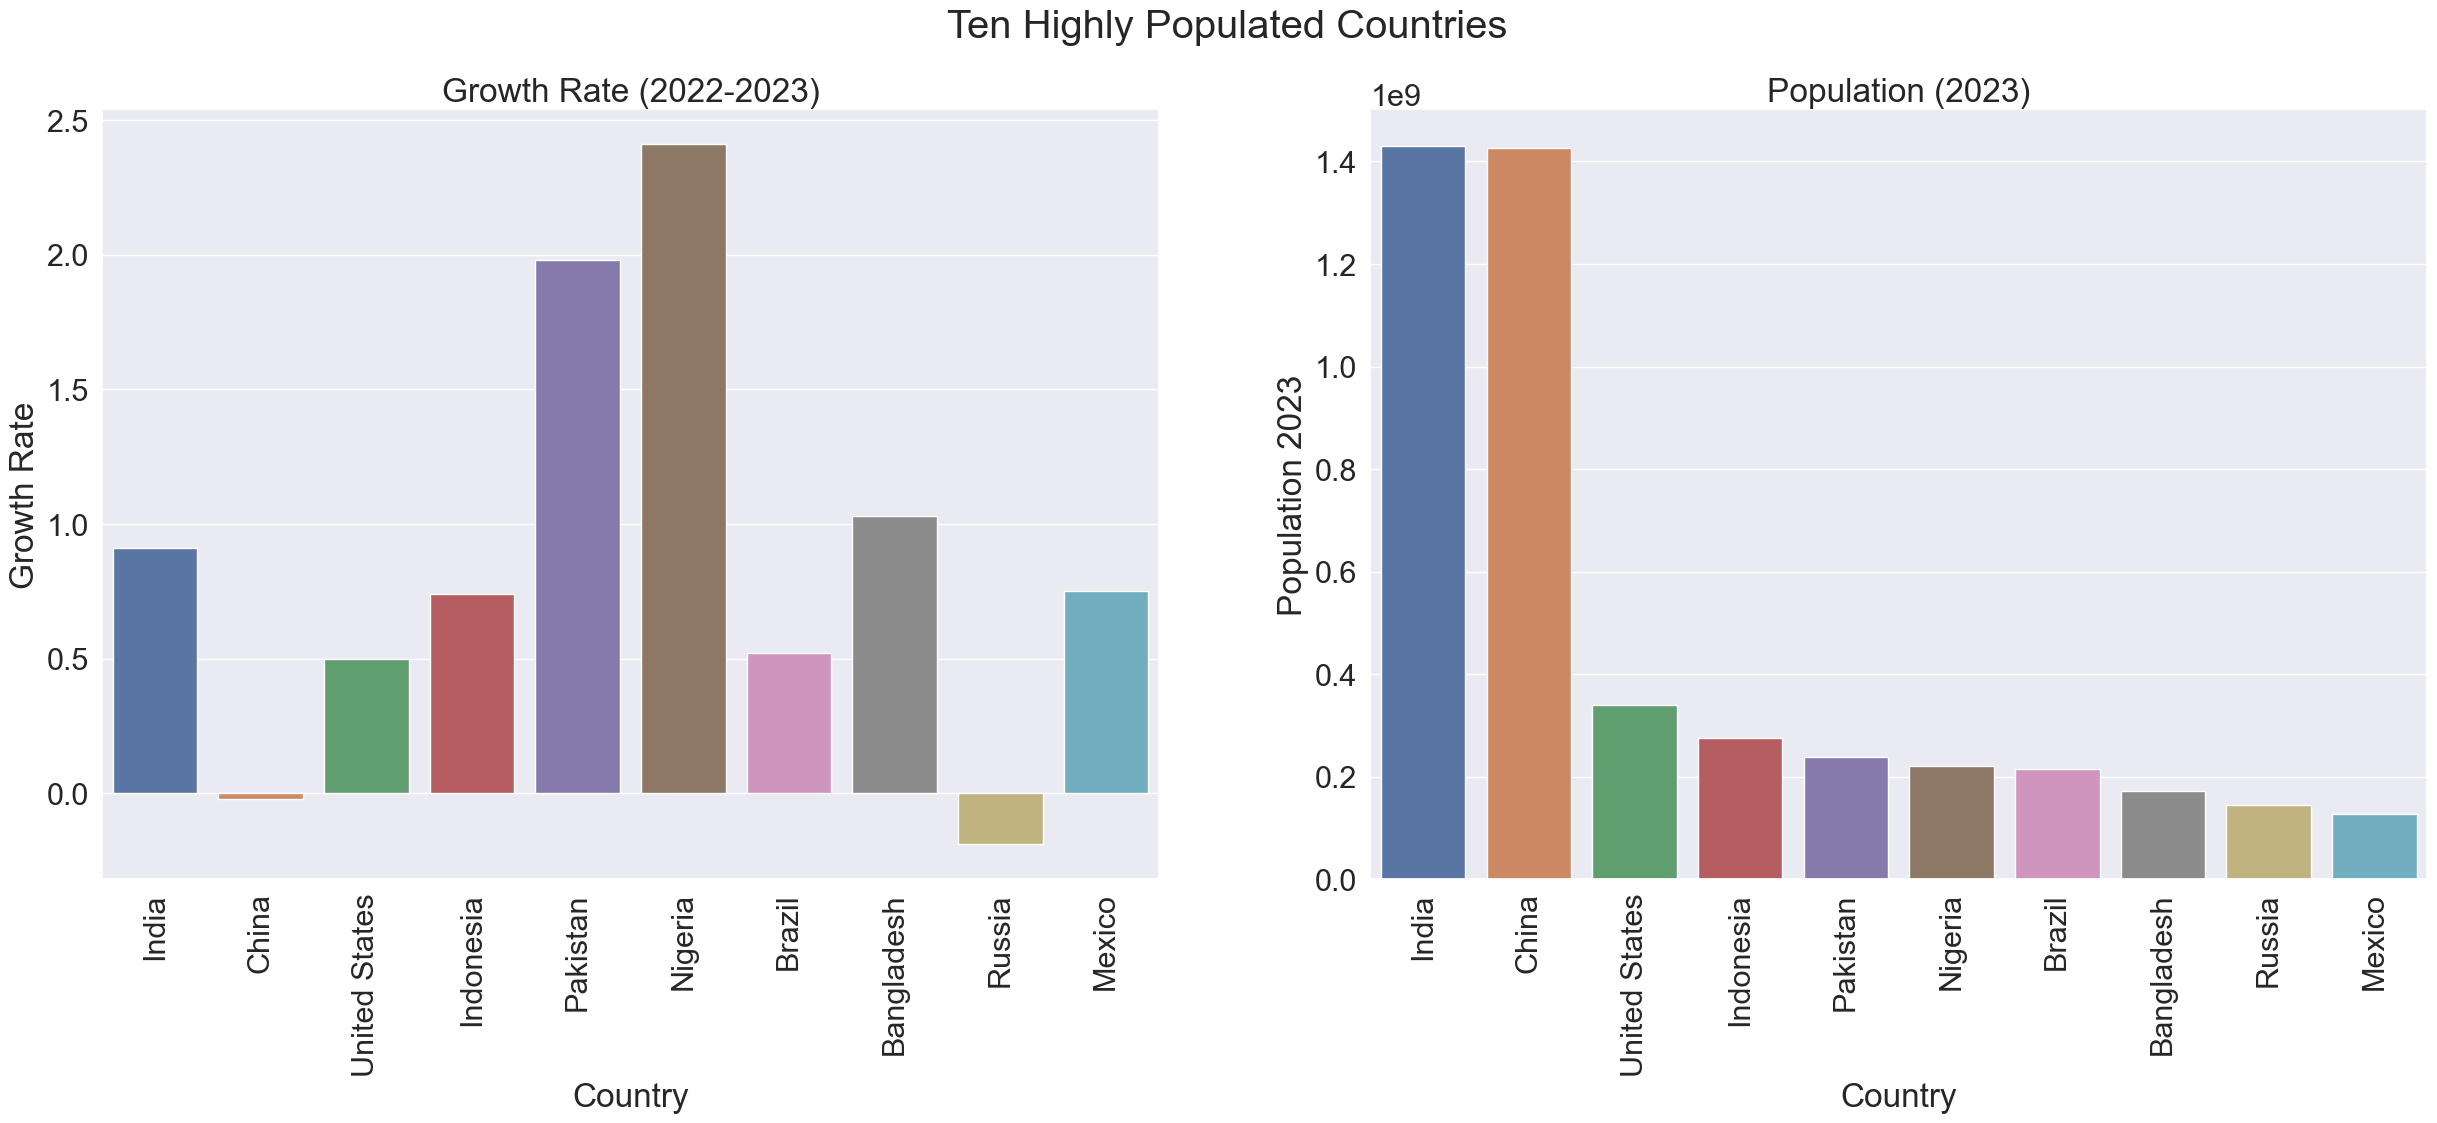

In [29]:
# Plotting barplots to depict relationship between current population and rowth rates of top 10 heavily populated countries
sns.set(font_scale=2)
fig, ax =plt.subplots(1,2,figsize = (30,10))

sns.barplot( x = "Country", y = "Growth Rate",data = m1, ax=ax[0])
sns.barplot(x ="Country",y = "Population 2023",data =m1, ax=ax[1])

ax[0].set_title ("Growth Rate (2022-2023)")
ax[1].set_title("Population (2023)")


ax[0].set_xticklabels(labels = m1["Country"],rotation=90)
ax[1].set_xticklabels(labels = m1["Country"],rotation=90)

plt.suptitle ("Ten Highly Populated Countries")
plt.show()


In [30]:
# Employing .tail() method to retrieve bottom 10 records
df["World %"] = df["World %"].fillna(0)
l1= df.tail(10)
l1

,Country,Population 2023,Population 2022,Area(km²),Land Area(km²),Density (/km²),Growth Rate,World %,Rank
195,Greenland,56643,56466,2.2M,410.4K,0.14,0.31,0.0,208
196,Saint Kitts And Nevis,47755,47657,261,260,184.00,0.21,0.0,211
197,Marshall Islands,41996,41569,181,180,233.00,1.03,0.0,215
198,Liechtenstein,39584,39327,160,160,247.00,0.65,0.0,216
199,Monaco,36297,36469,2,2,18149.00,-0.47,0.0,217
200,San Marino,33642,33660,61,60,561.00,-0.05,0.0,218
201,Palau,18058,18055,459,460,39.00,0.02,0.0,222
202,Nauru,12780,12668,21,20,639.00,0.88,0.0,225
203,Tuvalu,11396,11312,26,30,380.00,0.74,0.0,227
204,Vatican City,518,510,< 1,< 1,1177.00,1.57,0.0,234


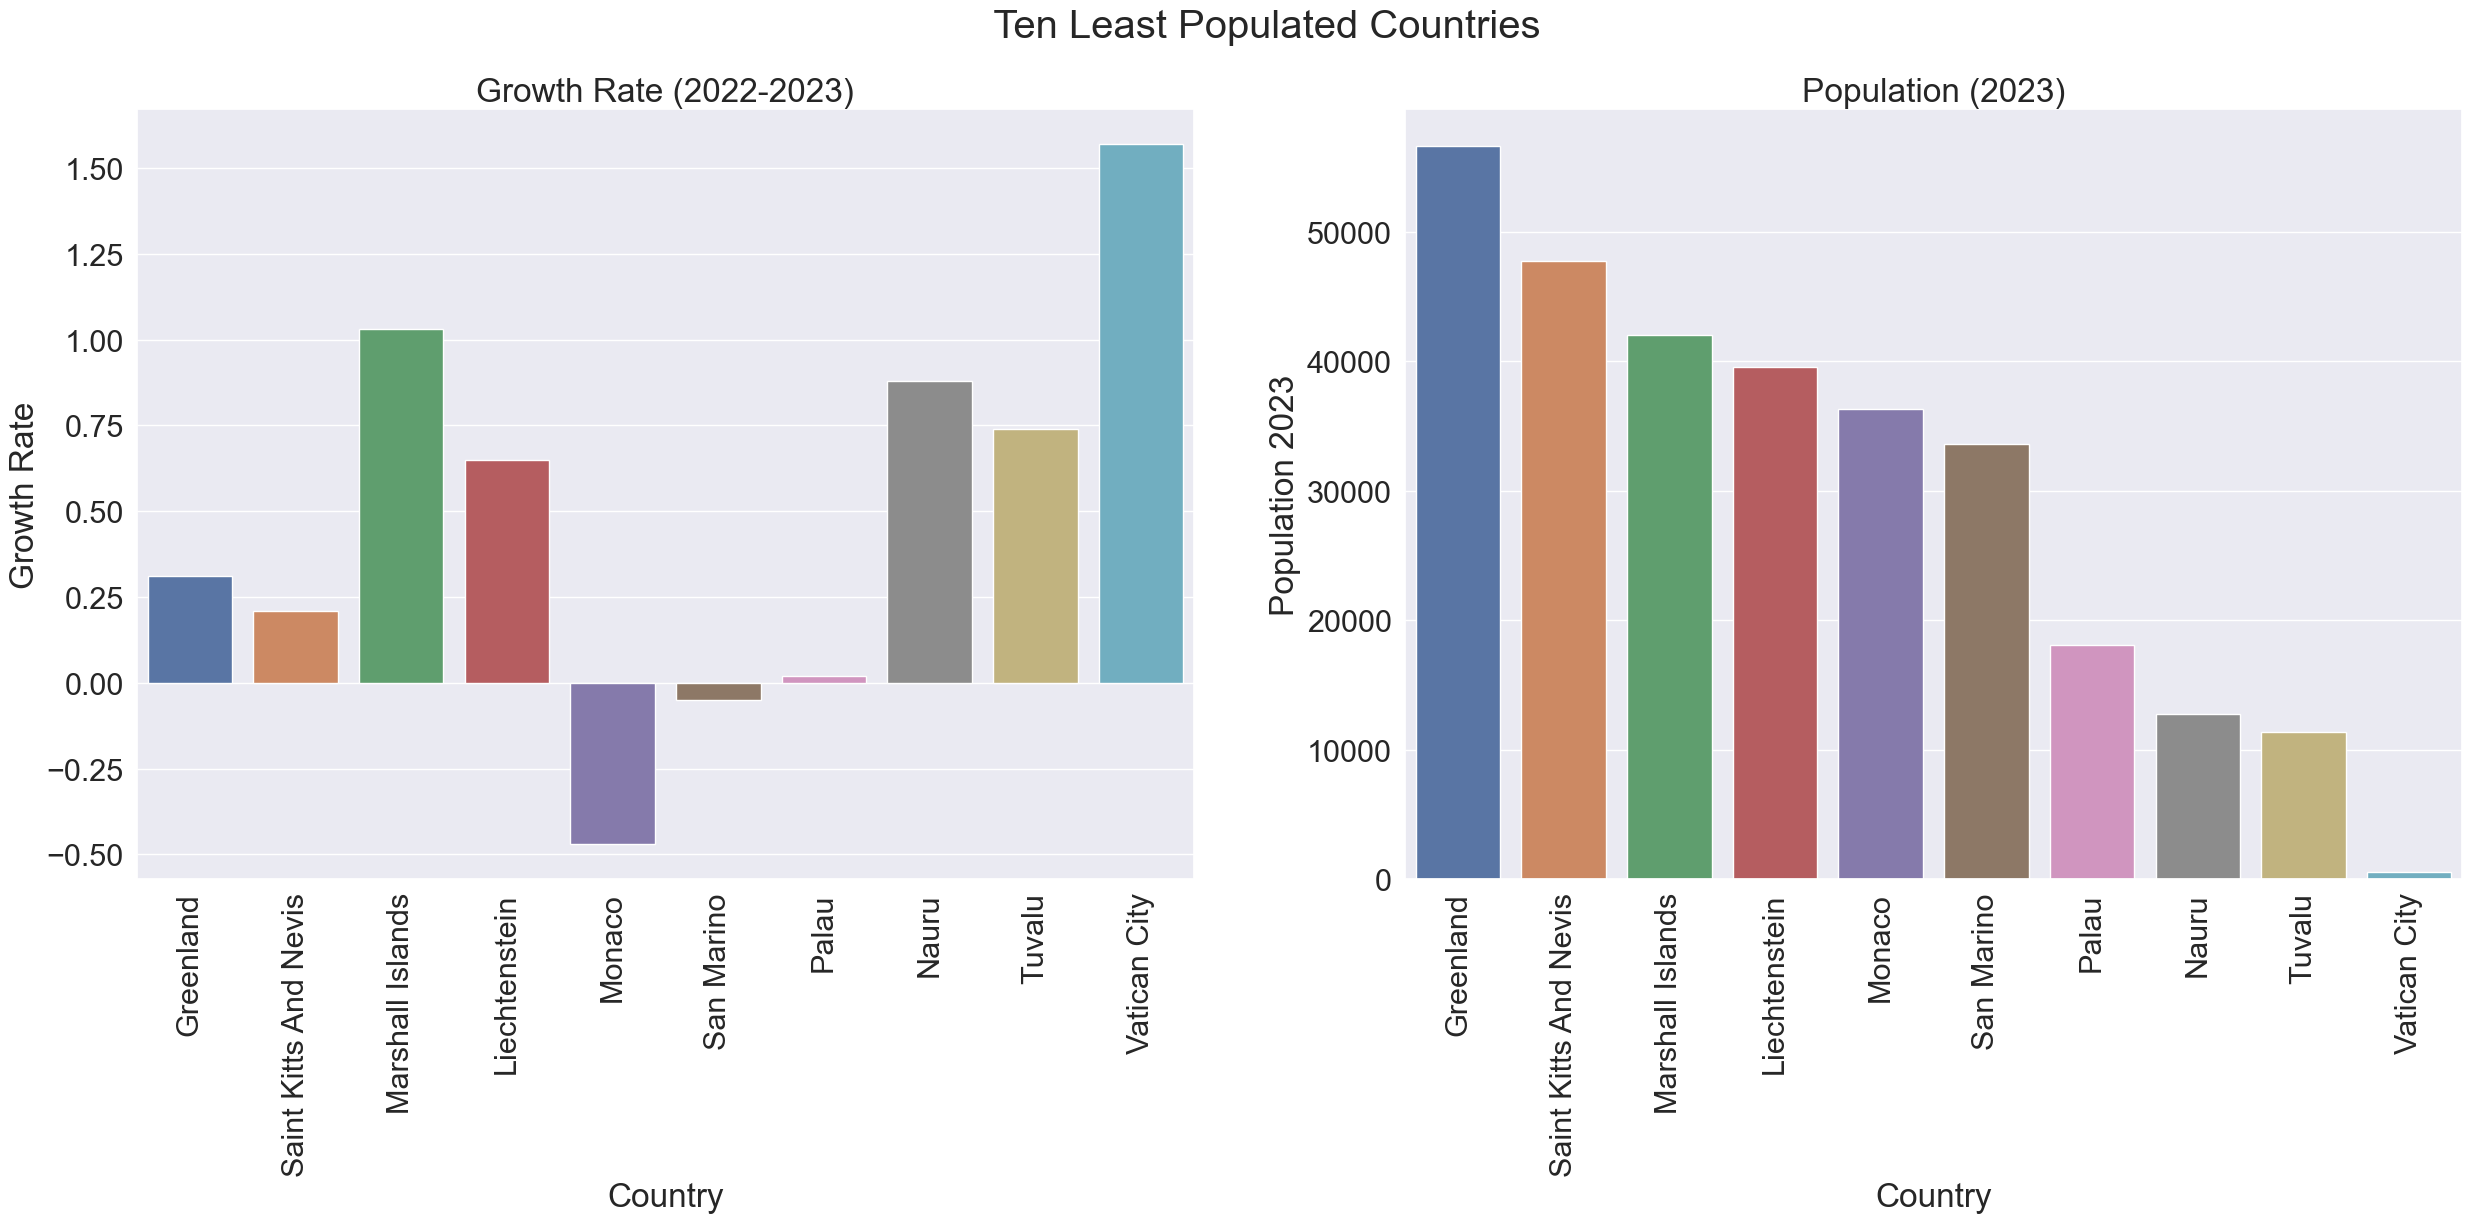

In [31]:
# Plotting barplots to depict relationship between current population and growth rates of top 10 least populous contries
sns.set(font_scale=2)

fig, ax =plt.subplots(1,2,figsize = (30,10))

sns.barplot( x = "Country", y = "Growth Rate",data = l1, ax=ax[0])

sns.barplot(x ="Country",y = "Population 2023",data =l1, ax=ax[1])

ax[0].set_title ("Growth Rate (2022-2023)")
ax[1].set_title("Population (2023)")
ax[0].set_xticklabels(labels = l1["Country"],rotation=90)
ax[1].set_xticklabels(labels = l1["Country"],rotation=90)
plt.suptitle (" Ten Least Populated Countries")
plt.show()

In [32]:
p_g = df[df["Growth Rate"] >0].sort_values("Growth Rate",ignore_index = True, ascending = False)
p_g

,Country,Population 2023,Population 2022,Area(km²),Land Area(km²),Density (/km²),Growth Rate,World %,Rank
0,Moldova,3487283,3272996,33.8K,32.9K,104.0,4.98,0.04,134
1,Syria,22754313,22125249,185.2K,183.6K,126.0,4.98,0.29,60
2,Niger,26780177,26207977,1.3M,1.3M,21.0,3.80,0.34,54
3,Dr Congo,100880253,99010212,2.3M,2.3M,45.0,3.29,1.28,15
4,Chad,18044193,17723315,1.3M,1.3M,15.0,3.13,0.23,67
...,...,...,...,...,...,...,...,...,...
168,Hong Kong,7488976,7488865,1.1K,1.1K,7135.0,0.04,0.09,104
169,Guadeloupe,395839,395752,1.6K,1.6K,243.0,0.02,0.00,178
170,Palau,18058,18055,459,460,39.0,0.02,0.00,222
171,Czech Republic,10491345,10493986,78.9K,77.2K,136.0,0.01,0.13,89


[]

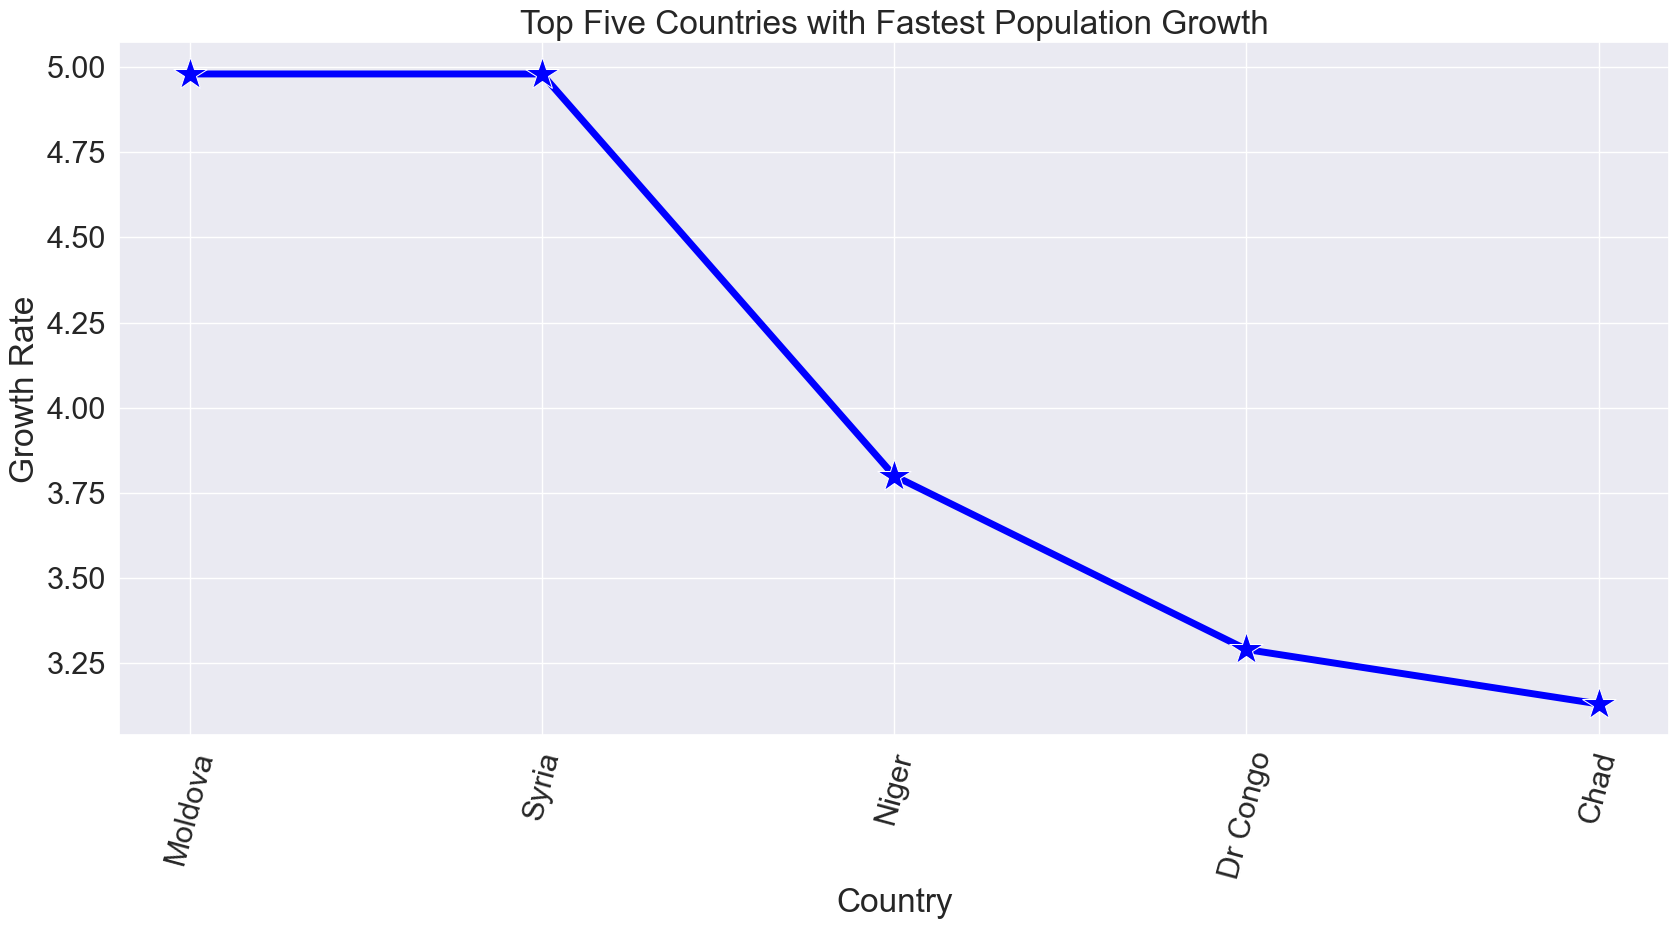

In [33]:
# Plotting lineplot to demostrate growth rate of top 5 fastest growing countries in terms of population size
plt.figure(figsize =(20,9))
sns.lineplot(data = p_g.head(), x = "Country",y = "Growth Rate",marker = "*", color = "blue",markersize=25 ,linewidth=5)
plt.xticks(rotation =75)
plt.title("Top Five Countries with Fastest Population Growth")
plt.plot()

In [34]:
n_g = df[df["Growth Rate"] <0].sort_values("Growth Rate",ignore_index = True)
n_g

,Country,Population 2023,Population 2022,Area(km²),Land Area(km²),Density (/km²),Growth Rate,World %,Rank
0,Ukraine,36181079,39701739,603.5K,579.4K,63.0,-7.45,0.46,41
1,Lebanon,5413182,5489739,10.5K,10.2K,523.0,-2.47,0.07,122
2,Bulgaria,6723268,6781953,110.9K,108.6K,62.0,-1.39,0.08,110
3,Lithuania,2728886,2750055,65.3K,62.6K,43.0,-1.15,0.03,142
4,Latvia,1838111,1850651,64.6K,62.2K,29.0,-1.10,0.02,151
5,Serbia,7175411,7221365,88.4K,87.5K,82.0,-1.00,0.09,105
6,Bosnia And Herzegovina,3218747,3233526,51.2K,51.2K,63.0,-0.70,0.04,137
7,Croatia,4017834,4030358,56.6K,56K,72.0,-0.54,0.05,130
8,Maldives,522338,523787,300,300,1737.0,-0.53,0.01,174
9,Japan,123569707,123951692,377.9K,364.5K,338.0,-0.53,1.54,12


[]

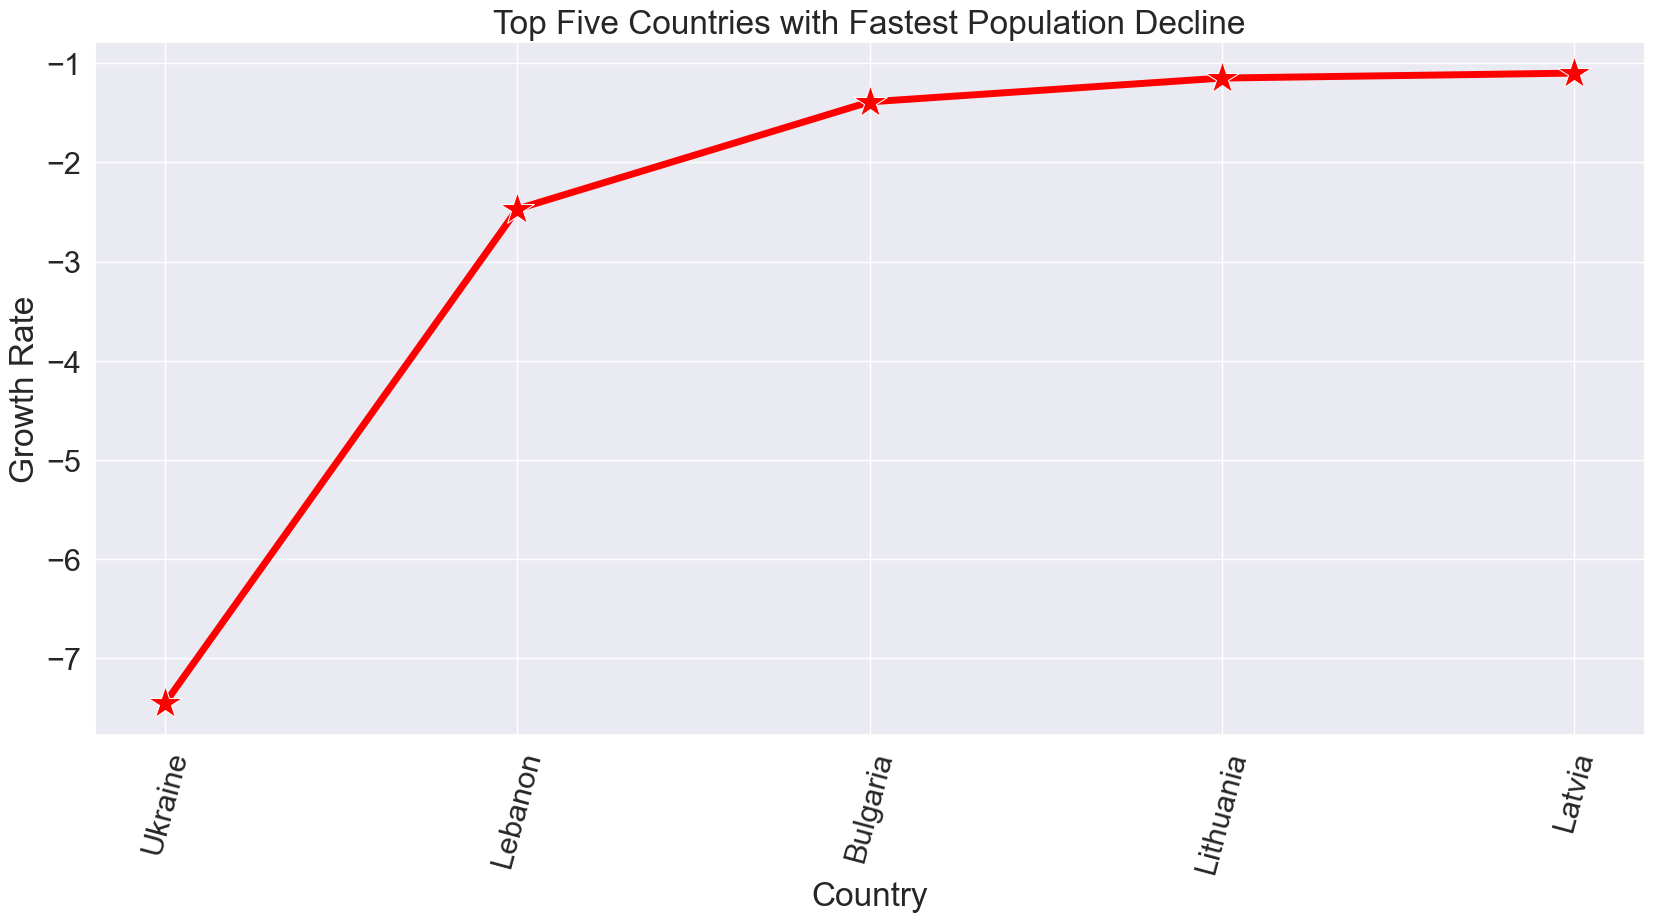

In [35]:
# Plotting lineplot to demostrate growth rate of top 5 fastest population decline
plt.figure(figsize =(20,9))
sns.lineplot(data = n_g.head(), x = "Country",y = "Growth Rate",marker = "*", color = "red",markersize=25 ,linewidth=5)
plt.xticks(rotation =75)
plt.title("Top Five Countries with Fastest Population Decline")
plt.plot()

In [36]:
 df[df["Population 2023"] > 100000000 ].sort_values("Rank",ignore_index = False)


,Country,Population 2023,Population 2022,Area(km²),Land Area(km²),Density (/km²),Growth Rate,World %,Rank
0,India,1429834379,1417173173,3.3M,3M,481.0,0.91,17.85,1
1,China,1425820141,1425887337,9.7M,9.4M,151.0,-0.02,17.81,2
2,United States,339231549,338289857,9.4M,9.1M,37.0,0.50,4.25,3
3,Indonesia,276576867,275501339,1.9M,1.9M,148.0,0.74,3.47,4
4,Pakistan,238517163,235824862,881.9K,770.9K,312.0,1.98,3.00,5
5,Nigeria,221592544,218541212,923.8K,910.8K,246.0,2.41,2.80,6
6,Brazil,215904975,215313498,8.5M,8.4M,26.0,0.52,2.70,7
7,Bangladesh,172220907,171186372,147.6K,130.2K,1329.0,1.03,2.16,8
8,Russia,144652401,144713314,17.1M,16.4M,9.0,-0.19,1.80,9
9,Mexico,128061868,127504125,2M,1.9M,66.0,0.75,1.60,10


In [37]:
density =df.sort_values("Density (/km²)", ignore_index = True,ascending = False)
density

,Country,Population 2023,Population 2022,Area(km²),Land Area(km²),Density (/km²),Growth Rate,World %,Rank
0,Monaco,36297,36469,2,2,18149.00,-0.47,0.00,217
1,Singapore,5998922,5975689,710,718,8377.00,0.65,0.08,114
2,Hong Kong,7488976,7488865,1.1K,1.1K,7135.00,0.04,0.09,104
3,Bahrain,1480242,1472233,765,785,1892.00,0.90,0.02,154
4,Maldives,522338,523787,300,300,1737.00,-0.53,0.01,174
...,...,...,...,...,...,...,...,...,...
200,Australia,26329824,26177413,7.7M,7.7M,3.00,1.00,0.33,55
201,Namibia,2588371,2567012,825.6K,823.3K,3.00,1.45,0.03,145
202,Mongolia,3427406,3398366,1.6M,1.6M,2.00,1.44,0.04,133
203,Western Sahara,581992,575986,266K,266K,2.00,1.96,0.01,172


In [38]:
# Top 5 highly dense countries
d1 = density.head()
d1

,Country,Population 2023,Population 2022,Area(km²),Land Area(km²),Density (/km²),Growth Rate,World %,Rank
0,Monaco,36297,36469,2,2,18149.0,-0.47,0.00,217
1,Singapore,5998922,5975689,710,718,8377.0,0.65,0.08,114
2,Hong Kong,7488976,7488865,1.1K,1.1K,7135.0,0.04,0.09,104
3,Bahrain,1480242,1472233,765,785,1892.0,0.90,0.02,154
4,Maldives,522338,523787,300,300,1737.0,-0.53,0.01,174


In [39]:
# Top 5 least dense countries
d2 =density.tail()
d2

,Country,Population 2023,Population 2022,Area(km²),Land Area(km²),Density (/km²),Growth Rate,World %,Rank
200,Australia,26329824,26177413,7.7M,7.7M,3.00,1.00,0.33,55
201,Namibia,2588371,2567012,825.6K,823.3K,3.00,1.45,0.03,145
202,Mongolia,3427406,3398366,1.6M,1.6M,2.00,1.44,0.04,133
203,Western Sahara,581992,575986,266K,266K,2.00,1.96,0.01,172
204,Greenland,56643,56466,2.2M,410.4K,0.14,0.31,0.00,208


In [40]:
# Appending records of top 5 highly and least dense countries
d = d1.append(d2,ignore_index = True)
d

C:\Users\janar\AppData\Local\Temp\ipykernel_25684\147292077.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  d = d1.append(d2,ignore_index = True)


,Country,Population 2023,Population 2022,Area(km²),Land Area(km²),Density (/km²),Growth Rate,World %,Rank
0,Monaco,36297,36469,2,2,18149.00,-0.47,0.00,217
1,Singapore,5998922,5975689,710,718,8377.00,0.65,0.08,114
2,Hong Kong,7488976,7488865,1.1K,1.1K,7135.00,0.04,0.09,104
3,Bahrain,1480242,1472233,765,785,1892.00,0.90,0.02,154
4,Maldives,522338,523787,300,300,1737.00,-0.53,0.01,174
5,Australia,26329824,26177413,7.7M,7.7M,3.00,1.00,0.33,55
6,Namibia,2588371,2567012,825.6K,823.3K,3.00,1.45,0.03,145
7,Mongolia,3427406,3398366,1.6M,1.6M,2.00,1.44,0.04,133
8,Western Sahara,581992,575986,266K,266K,2.00,1.96,0.01,172
9,Greenland,56643,56466,2.2M,410.4K,0.14,0.31,0.00,208


Text(0.5, 1.0, 'Relation Between Density and Population')

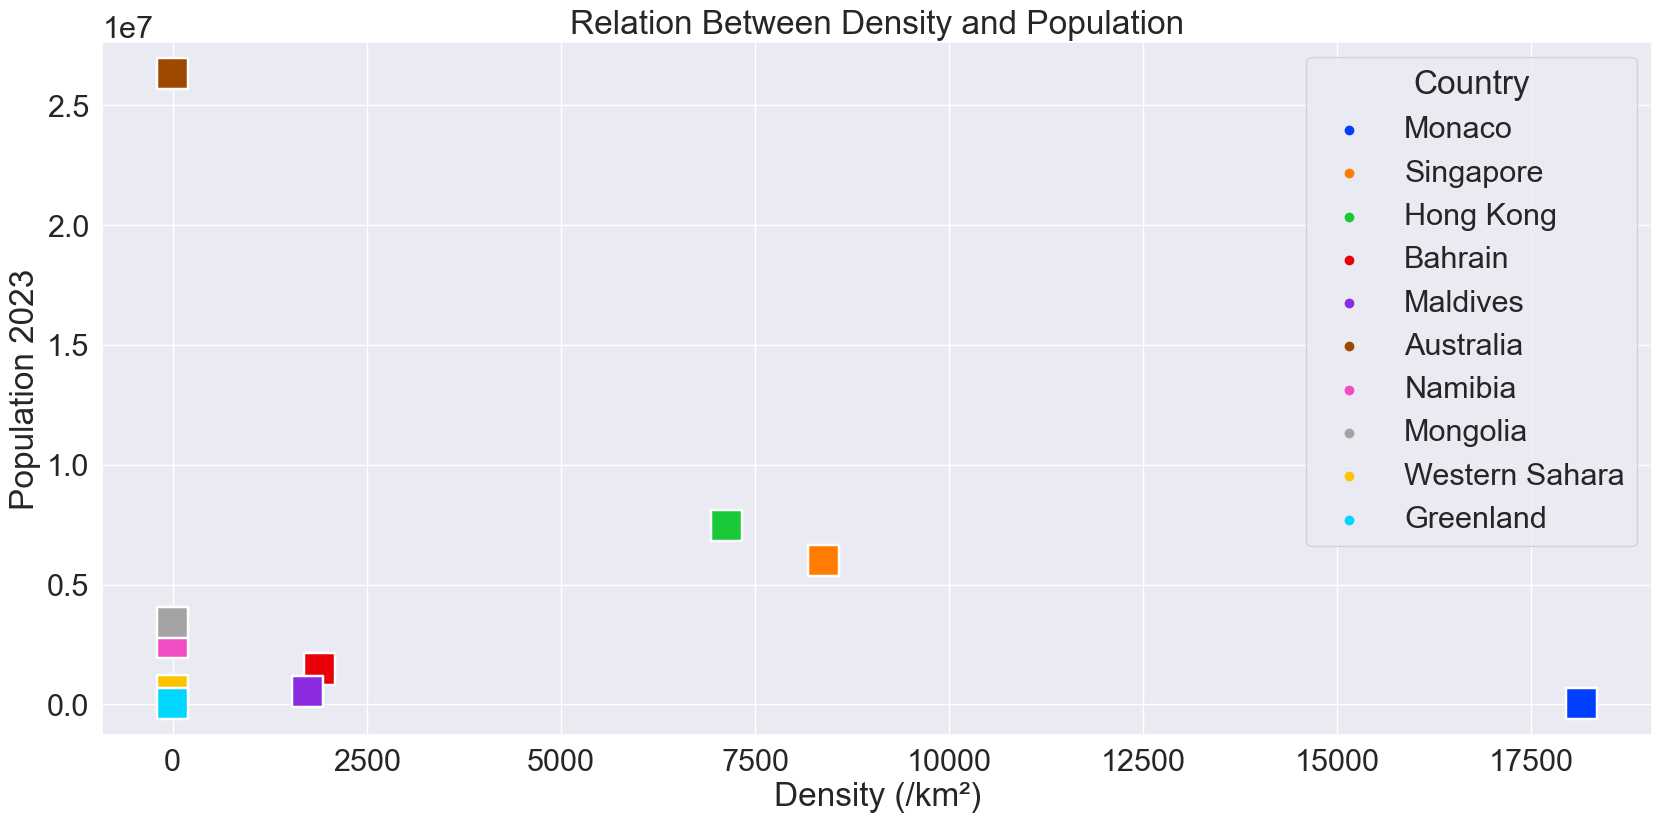

In [41]:
# Plotting scatterplot to explore relationship between Density and Population
plt.figure(figsize =(20,9))
sns.scatterplot( x = "Density (/km²)", y = "Population 2023",data = d, hue = "Country", s= 500,marker = "s",palette ="bright")
plt.title("Relation Between Density and Population")

In [42]:
df

,Country,Population 2023,Population 2022,Area(km²),Land Area(km²),Density (/km²),Growth Rate,World %,Rank
0,India,1429834379,1417173173,3.3M,3M,481.0,0.91,17.85,1
1,China,1425820141,1425887337,9.7M,9.4M,151.0,-0.02,17.81,2
2,United States,339231549,338289857,9.4M,9.1M,37.0,0.50,4.25,3
3,Indonesia,276576867,275501339,1.9M,1.9M,148.0,0.74,3.47,4
4,Pakistan,238517163,235824862,881.9K,770.9K,312.0,1.98,3.00,5
...,...,...,...,...,...,...,...,...,...
200,San Marino,33642,33660,61,60,561.0,-0.05,0.00,218
201,Palau,18058,18055,459,460,39.0,0.02,0.00,222
202,Nauru,12780,12668,21,20,639.0,0.88,0.00,225
203,Tuvalu,11396,11312,26,30,380.0,0.74,0.00,227


In [43]:
df["Population 2023"].sum()

8016992501